In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_excel('./pokemon_data.xlsx')
df.head(n=10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [3]:
df['TOTAL'] = df.iloc[:, 4:10].sum(axis=1)


cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]

In [4]:
combats = pd.read_csv('./combats.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combats.Winner.value_counts()
# get the number of wins for each pokemon
rawNumberOfWins = combats.groupby('Winner').count()

#both methods produce the same results
countByFirst = combats.groupby('Second_pokemon').count()
countBySecond = combats.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [6]:
rawNumberOfWins = rawNumberOfWins.sort_index()
rawNumberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
rawNumberOfWins['Win Percentage']= rawNumberOfWins.First_pokemon/rawNumberOfWins['Total Fights']
numberOfWins = pd.DataFrame({});
numberOfWins['Total Fights'] = rawNumberOfWins['Total Fights'];
numberOfWins['Win Percentage'] = rawNumberOfWins['Win Percentage'];
# merge the combats dataset and the pokemon dataset
df = pd.merge(df, numberOfWins, left_on='#', right_index = True, how='left')

In [7]:
df.columns = df.columns.str.upper().str.replace('_', '') #change into upper case
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL FIGHTS,WIN PERCENTAGE
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,133.0,0.278195
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,121.0,0.380165
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,125.0,0.560000
4,5,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,112.0,0.491071


In [8]:
# win percentage missing datas
df[df['WIN PERCENTAGE'].isnull()]

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL FIGHTS,WIN PERCENTAGE
11,12,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,NaN,NaN
32,33,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False,NaN,NaN
65,66,Poliwag,Water,NaN,300,40,50,40,40,40,90,1,False,NaN,NaN
77,78,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False,NaN,NaN
89,90,Magneton,Electric,Steel,465,50,60,95,120,70,70,1,False,NaN,NaN
143,144,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False,NaN,NaN
182,183,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,False,NaN,NaN
230,231,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,NaN,NaN
235,236,Ursaring,Normal,NaN,500,90,130,75,75,75,55,2,False,NaN,NaN


In [9]:
# worst 10 pokemons with win percentage
df[np.isfinite(df['WIN PERCENTAGE'])].sort_values(by = ['WIN PERCENTAGE']).head(10)

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL FIGHTS,WIN PERCENTAGE
289,290,Silcoon,Bug,NaN,205,50,35,55,25,25,15,3,False,138.0,0.021739
189,190,Togepi,Fairy,NaN,245,35,20,65,40,65,20,2,False,122.0,0.024590
638,639,Solosis,Psychic,NaN,290,45,30,40,105,50,20,5,False,129.0,0.031008
236,237,Slugma,Fire,NaN,250,40,40,40,70,40,20,2,False,123.0,0.032520
576,577,Munna,Psychic,NaN,292,76,25,45,67,55,24,5,False,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False,115.0,0.043478
394,395,Wynaut,Psychic,NaN,260,95,23,48,23,48,23,3,False,130.0,0.046154
209,210,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False,125.0,0.048000
291,292,Cascoon,Bug,NaN,205,50,35,55,25,25,15,3,False,133.0,0.052632
752,753,Spritzee,Fairy,NaN,341,78,52,60,63,65,23,6,False,133.0,0.060150


In [10]:
# top 10 pokemons with win percentage
df[np.isfinite(df['WIN PERCENTAGE'])].sort_values(by = ['WIN PERCENTAGE'], ascending = False ).head(10)

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY,TOTAL FIGHTS,WIN PERCENTAGE
154,155,Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,129.0,0.984496
512,513,Weavile,Dark,Ice,510,70,120,65,45,85,125,4,False,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False,129.0,0.961240
726,727,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,600,100,128,90,77,77,128,5,False,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,560,70,140,70,110,65,105,3,False,120.0,0.950000


In [11]:
print('The columns of the dataset are: ',df.columns) #show the dataframe columns
print('The shape of the dataframe is: ',df.shape)    #shape of the dataframe

The columns of the dataset are:  Index(['#', 'NAME', 'TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE',
       'SP. ATK', 'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY',
       'TOTAL FIGHTS', 'WIN PERCENTAGE'],
      dtype='object')
The shape of the dataframe is:  (800, 15)


In [12]:
print('The unique  pokemon types are',df['TYPE 1'].unique()) #shows all the unique types in column
print('The number of unique types are',df['TYPE 1'].nunique()) #shows count of unique values 

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


In [13]:
# summary of the pokemon dataframe
df.describe()

,#,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,TOTAL FIGHTS,WIN PERCENTAGE
count,800.0000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000
mean,400.5000,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,127.541507,0.501538
std,231.0844,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,11.397402,0.254993
min,1.0000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,92.000000,0.021739
25%,200.7500,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,120.000000,0.284228
50%,400.5000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,128.000000,0.491071
75%,600.2500,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,135.000000,0.717644
max,800.0000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,164.000000,0.984496


-Give basic statistical details about each of the variables (at least
5 columns)

In [14]:
print(df)

       #            NAME   TYPE 1  TYPE 2  TOTAL  HP  ATTACK  DEFENSE  \
0      1       Bulbasaur    Grass  Poison    318  45      49       49   
1      2         Ivysaur    Grass  Poison    405  60      62       63   
2      3        Venusaur    Grass  Poison    525  80      82       83   
3      4   Mega Venusaur    Grass  Poison    625  80     100      123   
4      5      Charmander     Fire     NaN    309  39      52       43   
..   ...             ...      ...     ...    ...  ..     ...      ...   
795  796         Diancie     Rock   Fairy    600  50     100      150   
796  797    Mega Diancie     Rock   Fairy    700  50     160      110   
797  798  Hoopa Confined  Psychic   Ghost    600  80     110       60   
798  799   Hoopa Unbound  Psychic    Dark    680  80     160       60   
799  800       Volcanion     Fire   Water    600  80     110      120   

     SP. ATK  SP. DEF  SPEED  GENERATION  LEGENDARY  TOTAL FIGHTS  \
0         65       65     45           1      False   

In [15]:
print(df.describe())

              #      TOTAL          HP      ATTACK     DEFENSE     SP. ATK  \
count  800.0000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000  435.10250   69.258750   79.001250   73.842500   72.820000   
std    231.0844  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.0000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    200.7500  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    400.5000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    600.2500  515.00000   80.000000  100.000000   90.000000   95.000000   
max    800.0000  780.00000  255.000000  190.000000  230.000000  194.000000   

          SP. DEF       SPEED  GENERATION  TOTAL FIGHTS  WIN PERCENTAGE  
count  800.000000  800.000000   800.00000    783.000000      783.000000  
mean    71.902500   68.277500     3.32375    127.541507        0.501538  
std     27.828916   29.060474     1.66129     11.397402        0.254993  
m

-Appropriate visuals (histogram, box plots…)

<AxesSubplot:>

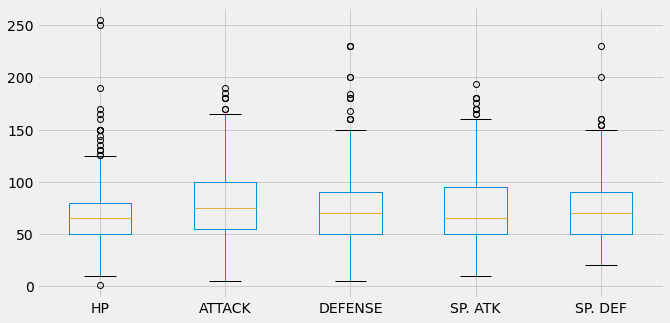

In [16]:
features = pd.DataFrame(df,columns=['HP','ATTACK','DEFENSE','SP. ATK','SP. DEF'])
features.boxplot(figsize=(10, 5))

In [ ]:
stats = df.dtypes[df.dtypes == 'int64'].index
stats = stats[1:10]
fig = plt.figure(figsize=(18, 18))
for i, stat in enumerate(stats):
    fig.add_subplot(4, 3, i + 1)
    plt.hist(df[stat], bins=40, color="skyblue")
    plt.title(stat)
plt.show()

In [ ]:
print('Number of Missing values.')
df.isnull().sum()

In [ ]:
# some values in TYPE2 are empty and thus they have to be filled or deleted
df['TYPE 2'].fillna(df['TYPE 1'], inplace=True) #fill NaN values in Type2 with corresponding values of Type

# some values in WIN PERCENTAGE are null and thus they have deleted
df.dropna(subset = ["WIN PERCENTAGE"], inplace=True)

In [ ]:
# SUMMARY
print("Summary data count is:", df.count()['#'])
df.head()

In [ ]:
#we have some outliers. lets handle them.

def handle_outliers(data):
    return winsorize(data, (0.01, 0.03))

df["HP"] = handle_outliers(df["HP"])
df["ATTACK"] = handle_outliers(df["ATTACK"])
df["DEFENSE"] = handle_outliers(df["DEFENSE"])
df["SP. ATK"] = handle_outliers(df["SP. ATK"])
df["SP. DEF"] = handle_outliers(df["SP. DEF"])

# Now lets draw boxplots again.

In [ ]:
features = pd.DataFrame(df,columns=['HP','ATTACK','DEFENSE','SP. ATK','SP. DEF'])
features.boxplot(figsize=(10, 5))

# We handled outliers. Lets draw bivariate graphs.

In [ ]:
stats = df.dtypes[df.dtypes == 'int64'].index
stats = stats[2:7]
fig = plt.figure(figsize=(18, 14))
for i, stat in enumerate(stats):
    fig.add_subplot(3, 3, i + 1)
    plt.scatter(data=df[df['TYPE 1'].isin(df['TYPE 1'].value_counts()[:6].index)], x='WIN PERCENTAGE', y= stat)
    plt.title(stat + " / WIN PERCENTAGE")
plt.show()

# The relationship between each of the variables and theresponse variables is visualized (choose the best visualization technique)

we will use seaborn graphs to indicate response variables also.

In [ ]:
col = ['HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED', 'WIN PERCENTAGE']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(df.loc[:,col])

# Statistical analysis for each of the relationships that have been visualized

In [ ]:
df.loc[:,col].corr()

In [ ]:
dfCM = pd.DataFrame(df,columns=['TOTAL','HP','ATTACK','DEFENSE','SP. ATK','SP. DEF','SPEED','WIN PERCENTAGE'])
corrMatrix = dfCM.corr()
f, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
ax = sns.regplot(x="SPEED", y="WIN PERCENTAGE", data=df).set_title("Speed vs Win Percentage")
sns.lmplot(x="SPEED", y="WIN PERCENTAGE", data=df, hue = 'TYPE 1',fit_reg =False)

In [ ]:
import matplotlib.pyplot as plt
sns.regplot(x="SPEED", y="WIN PERCENTAGE", data=df, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="SPEED", y="WIN PERCENTAGE", data=df, hue = 'TYPE 1',  logistic=True)

# Regression with LinearRegression Method

In [ ]:
stats = df.dtypes[df.dtypes == 'int64'].index
stats = stats[1:8]
yVariable = "WIN PERCENTAGE"
fig = plt.figure(figsize=(20, 25))
for i, stat in enumerate(stats):
    xVariable = stat
    regresX = df.loc[:,xVariable:]
    regresy = pd.DataFrame(df.loc[:,yVariable])
    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(regresX.loc[:,xVariable]),
        regresy,
        random_state = 0
    )
    linreg = LinearRegression().fit(X_train, y_train)
    fig.add_subplot(3, 3, i + 1)
    x = np.array(df[xVariable])
    plt.scatter(df.loc[:,xVariable], regresy, marker= 'o', s=50, alpha=0.8)
    plt.plot(df.loc[:,xVariable], linreg.coef_ * x.reshape(-1,1) + linreg.intercept_, 'r-')
    plt.title('Least-squares linear regression,\nR-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
    plt.xlabel(xVariable)
    plt.ylabel(yVariable)
plt.show()

In [ ]:
stats = df.dtypes[df.dtypes == 'int64'].index
stats = stats[1:8]
yVariable = "WIN PERCENTAGE"
fig = plt.figure(figsize=(20, 25))
for i, stat in enumerate(stats):
    fig.add_subplot(3, 3, i + 1)
    xVariable = stat
    regresX = df.loc[:,xVariable:]
    regresy = pd.DataFrame(df.loc[:,yVariable])
    X_train, X_test, y_train, y_test = train_test_split(
        pd.DataFrame(regresX.loc[:,xVariable]),
        regresy,
        random_state = 0
    )
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(X_train, y_train) 
    Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
    X_grid = np.arange(min(x), max(x), 0.01)                
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_train, y_train) 
    plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
    plt.title('Random Forest Regression,\nAccuracy score (test): {:.3f}'.format(regressor.score(X_test, y_test)))
    plt.xlabel(xVariable)
    plt.ylabel(yVariable)
plt.show()

TODO: For each of those algorithm, how did you choose appropriate parameters?

In [ ]:
# Plt Figure
fig = plt.figure(figsize=(18, 5))

# Regression Data
xVariable = "SPEED"
yVariable = "WIN PERCENTAGE"
regresX = df.loc[:,xVariable:]
regresy = pd.DataFrame(df.loc[:,yVariable])
X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(regresX.loc[:,xVariable]),
    regresy,
    random_state = 0
)

# Linear Regression
fig.add_subplot(1, 2, 1)
linreg = LinearRegression().fit(X_train, y_train)
x = np.array(df[xVariable])
plt.scatter(df.loc[:,xVariable], regresy, marker= 'o', s=50, alpha=0.8)
plt.plot(df.loc[:,xVariable], linreg.coef_ * x.reshape(-1,1) + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression,\nR-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
plt.xlabel(xVariable)
plt.ylabel(yVariable)

# Random Forest Regression
fig.add_subplot(1, 2, 2)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
X_grid = np.arange(min(x), max(x), 0.01)                
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train) 
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Random Forest Regression,\nAccuracy score (test): {:.3f}'.format(regressor.score(X_test, y_test)))
plt.xlabel(xVariable)
plt.ylabel(yVariable)

# plt Show
plt.show()

TODO: Which algorithm performed better?

TODO:
# Did you select the features to be included in the model intelligently
• Which feature selection methods did you use?
• Did the the model performance change?
• Which features are included in your final model?